# Chapter 2. 데이터 적재

## 2.0 소개

* 머신러닝 작업의 첫 단계 : 시스템으로 원본 데이터를 불러온다.
* 원본 데이터 : 로그 파일, 데이터셋 파일, 데이터베이스
* 여러 소스에서 데이터를 추출해야 한다.
* csv, sql 데이터베이스 등 다양한 소스에서 데이터를 적재하는 방법을 소개한다.
    * 실험에 필요한 특성을 가진 모의 데이터 생성 가능하다.

## 2.1 샘플 데이터셋 적재하기

* 사이킷런의 데이터셋 활용

In [1]:
from sklearn import datasets

digits = datasets.load_digits() # 숫자 데이터 적재

features = digits.data # 특성 행렬 제작

target = digits.target # 타깃 벡터

# 첫 번째 샘플 확인
features[0]

C:\Users\gurdk\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

* 토이(toy) 데이터셋
    * 실전에서 만나느 것보다 아주 작고 잘 정제되어 있다.
    
    * load_boston : 회귀
    * load_iris : 분류
    * load_digits : 이미지 분류 작업

In [2]:
# sklearn.datasets 모듈 아래 함수는 딕셔너리와 유사한 Bunch 클래스 객체를 반환한다.
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits.values()

dict_values([array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), array([0, 1, 2, ..., 8, 9, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3.,

In [5]:
# DESCR 키 : 데이터셋에 대한 설명을 담는다.
digits['DESCR'][:70]

'.. _digits_dataset:\n\nOptical recognition of handwritten digits dataset'

* 이 함수의 유일한 매개변수인 return_X_y = True 설정하면 Bunch 클래스 객체가 아니라 특성 x와 타깃 y 배열 반환
* 기본적으로 False
* load_digits 함수 : 필요한 숫자 개수를 지정할 수 있는 n_class 매개변수를 추가로 제공한다.

In [6]:
import numpy as np

# 0부터 4까지 5개 숫자만 적재
X, y = datasets.load_digits(n_class=5, return_X_y=True)

# 배열의 고유 반환 값을 반환시킨다.
np.unique(y)

array([0, 1, 2, 3, 4])

## 2.2 모의 데이터셋

* 사이킷런에는 세 가지 방법을 사용한다.
    * 선형 회귀 : make_regression
    * 분류 : make_classification
    * 군집 : make_blobs

In [7]:
from sklearn.datasets import make_regression

# 특성 행렬, 타깃 벡터, 정답계수
features, target, coefficients = make_regression(n_samples= 100,
                                                n_features= 3,
                                                n_informative= 3,
                                                n_targets= 1,
                                                noise= 0.0,
                                                coef= True,
                                                random_state= 1)

In [8]:
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [9]:
# 분류
from sklearn.datasets import make_classification

features, target = make_classification(n_samples= 100,
                                      n_features= 3,
                                      n_informative= 3,
                                      n_redundant= 0,
                                      n_classes= 2,
                                      weights= [.25, .75],
                                      random_state= 1)

In [10]:
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


In [11]:
# 군집
from sklearn.datasets import make_blobs

features, target = make_blobs(n_samples= 100,
                             n_features= 2,
                             centers=3,
                             cluster_std= 0.5,
                             shuffle= True,
                             random_state= 1)

print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


* make_regression : 실수 특성 행렬과 실수 타깃 벡터 반환
* make_classification, make_blobs : 실수 특성 행렬과 클래스 소속(정수 타깃 벡터) 반환

* n_informative : 타깃 벡터를 생성하는데 사용할 특성 수 결정
    * n_features 전체 타깃 수 보다 더 작으면 만들어진 데이터셋에 여분의 특성이 생긴다.
    * 특성 선택 기법 사용한 구별해야 한다.

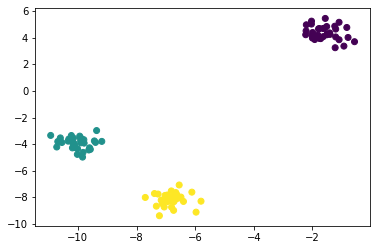

In [14]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

## 2.3 CSV 파일 적재하기

* CSV(Comma-Seperated-Value) 파일 불러오기
* read_csv : 판다스의 라이브러리, 원격 CSV 파일도 적재 가능하다.

In [15]:
import pandas as pd

# 데이터 url
url = 'https://tinyurl.com/simulated-data'

# 데이터 적재하기
dataframe = pd.read_csv(url)

dataframe.head(2)

C:\Users\gurdk\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


* csv 파일 불러올 때 두 가지 사항
     * 적재하기 전에 파일의 내용 확인
         * 데이터셋의 구성, 파일을 불러오기 위해 어떤 매개변수 설정할지 이해하는 데 크게 도움이 된다.
     * read_csv 함수의 매개변수는 30개가 넘는다. 대부분 매개변수는 다양한 종류의 CSV 파일을 지원한다.
         * 구분자로 탭 같은 다른 문자를 사용한 경우도 있다.
         * sep 매개변수에 파일 구분자를 지정할 수 있다.
         * header 매개변수 : 파일의 첫 번째 줄이 열 제목을 정의하는 데 사용되는 경우에 사용한다.
             * integer, datetime, category, 제목 행이 몇 번째 줄인지 지정도 가능하다.
             * header = None : 제목 행이 없으면 넣는다.

* header = None
    * names 매개변수로 제목 설정 가능하다.
    * header 매개변수 기본값 == 'infer'로 첫 번째 줄에서 제목 가져온다.
* skiprows : 건너 뛸 행의 개수나 범위 지정
* nrows : 읽을 행의 개수 지정

In [16]:
# 1~10번째 행을 건너뛰고 한 행을 읽는다.
dataframe = pd.read_csv(url, skiprows=range(1,11), nrows=1)

In [17]:
dataframe

,integer,datetime,category
0,5,2015-01-01 00:00:10,0


## 2.4 엑셀 파일 적재하기
* 판다스 라이브러리 read_excel 함수

In [18]:
import pandas as pd

url = 'https://tinyurl.com/simulated-excel'

dataframe = pd.read_excel(url, sheet_name=0, header=1)

dataframe.head(2)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0


* csv 파일과 비슷한 구조를 가진다.
* 차이점 : sheet_name 매개변수
    * 엑셀 파일에서 불러올 스프레드시트를 지정한다.
    * 0부터 시작하는 인덱스 : 정수나 문자열 등을 모두 받거나 이름이나 정수의 리스트도 가져온다.

        sheet_name = [0,1,2, "Monthly Sales"]
        
        
* read_excel 함수 : xlrd 패키지(콘다)를 설치한다.

      conda install xlrd
      pip install xlrd

* read_excel 함수 : na_filter, skip_rows, nrows, keep_default_na, na_values 매개변수 지원
    * sheetname은 삭제 예정

## 2.5 JSON 파일 불러오기

* 판다스 라이브러리 read_json 함수 사용 : JSON 파일을 데이터프레임 객체로 변환

In [20]:
import pandas as pd

url = 'https://tinyurl.com/simulated-json'

dataframe = pd.read_json(url, orient='columns') # orient 매개변수 쓴다.

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


* json 파일 불러오기
    * orient 매개변수 : JSON 파일의 구성을 지정한다.
    * split, records, index, columns, values 확인한다.
    * 구조화가 덜 된 JSON 데이터를 판다스 데이터프레임으로 바꿀 때는 **json_normalize 함수** 제공

* 'column' : JSON 파일 {열: {인덱스: 값, ...}, ...} 구조 기대

* 그 외 다른 값들의 구조
    * 'split' : {"index":[인덱스,...], "columns":[column,...], "data":[값,...]}
    * 'records' : [{열:값}, ..., {열:값}]
    * 'index' : {인덱스: {열: 값,...},...}
    * 'values' : [값,...]

## 2.6 SQL 데이터베이스로부터 적재하기

* SQL(structured query language) : 판다스의 `read_sql_query`

In [49]:
import pandas as pd
from sqlalchemy import create_engine

# DB 연결
database_connection = create_engine('sqlite:///sample.db')

# 불러오기
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


In [50]:
# 테이블의 전체 행을 가져온다.
dataframe = pd.read_sql_table('data', database_connection)
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


* SQL : DB에서 데이터를 끌어오는 표준 언어
    * SQLite DB 엔진으로 연결하고자 create_engine 사용
    * read_sql_query 함수 : SQL 사용해서 DB에 묻고 데이터프레임으로 가져온다.
    * SELECT * FROM data : DB에서 data 테이블의 모든 열을 반환하라고 요청한다.